<a href="https://colab.research.google.com/github/albertodiez1980LaRioja/Prueba/blob/master/pinturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Carga de librerias
from fastai.vision import *
import os
from google.colab import files
# para calcular los tiempos de entrenamiento
!pip install ipython-autotime

%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=03b63c0d5d3665b241d9c2f9cf03276c11e49524f4638529d1aa93ed5ec4f84f
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [2]:
!wget https://www.dropbox.com/s/g97own1uamaizgu/pinturas.zip?dl=0 -O pinturas.zip
!unzip pinturas.zip

--2020-04-27 20:53:51--  https://www.dropbox.com/s/g97own1uamaizgu/pinturas.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/g97own1uamaizgu/pinturas.zip [following]
--2020-04-27 20:53:52--  https://www.dropbox.com/s/raw/g97own1uamaizgu/pinturas.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc83aab5701ad285491574883853.dl.dropboxusercontent.com/cd/0/inline/A2pg10jknogbErGNxvzLun1uPHwJ4cb8g4oZsGSmyvea3oj2XNWFGFAythQj8dfs-1Htj5h2P_r0tcJJ5vS7Ed78weDriN5UV-CFE0ljOM4mjabn1IecvXHe4rSUMO73guA/file# [following]
--2020-04-27 20:53:52--  https://uc83aab5701ad285491574883853.dl.dropboxusercontent.com/cd/0/inline/A2pg10jknogbErGNxvzLun1uPHwJ4cb8g4oZsGSmyvea3oj2XNWFGFAythQj8dfs-1Htj5h2P_r0tcJJ5vS7Ed78weDriN5UV-CFE0ljOM4mj

In [3]:
# eliminamos las que no se pueden abrir
path = Path('')
for c in ['pinturas/1','pinturas/2','pinturas/3','pinturas/4','pinturas/5']:
  #print(c)
  print(path/c)
  verify_images(path/c,delete=True,max_size=500)
  # parece que todas son validas

pinturas/1


pinturas/2


pinturas/3
pinturas/4


pinturas/5


time: 9.47 s


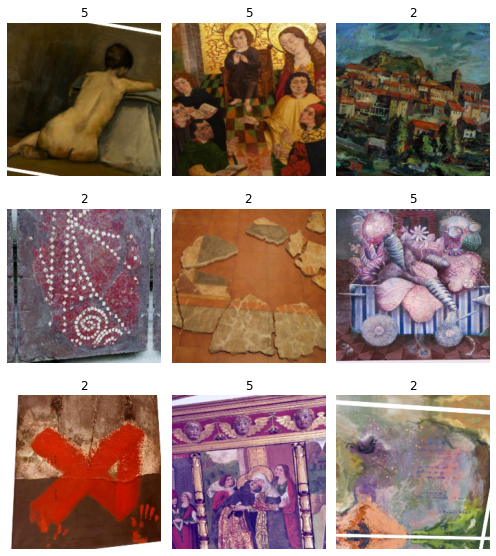

time: 2.98 s


In [4]:
# mostramos unas imagenes de prueba
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)
data.show_batch(rows=3,figsize=(7,8))

In [5]:
# creamos el modelo de prediccion
learn = create_cnn(data,models.resnet34,metrics=[error_rate,accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth



time: 2.47 s


In [6]:
# entrenamos la red
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.536178,4.387124,0.882353,0.117647,00:24
1,2.500315,3.787066,0.764706,0.235294,00:25
2,2.053254,3.655246,0.764706,0.235294,00:25
3,1.769238,3.334028,0.705882,0.294118,00:25


time: 1min 41s


In [7]:
# lo guardamos
learn.save('stage-1')

time: 93.8 ms


In [8]:
# lo descongelamos
learn.unfreeze()

time: 2.63 ms


In [0]:
# lo reentrenamos
learn.fit_one_cycle(4,max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.746750,2.960351,0.705882,0.294118,00:35
1,0.871723,2.717185,0.647059,0.352941,00:35
2,0.781162,2.529784,0.588235,0.411765,00:35


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2')

In [0]:
# toca reinterpretar los resultados
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *
ds, idxs = DatasetFormatter().from_toplosses(learn,ds_type=DatasetType.Valid)
ds.to_df().iloc[idxs[:10]] # las 10 imagenes con mayor perdida

In [0]:
learn.export()
!ls
learn2 = load_learner(".")